# Fuzzification and defuzzification
> Fuzzification and defuzzification are core concepts in **fuzzy logic** systems. 

### 1. **Fuzzification:**
Fuzzification converts **crisp input values** (precise values) into **fuzzy sets** using **membership functions**. A membership function maps input values to a range between 0 and 1.

#### Example: 
For a temperature control system:
- Temperature = 30°C
- **Fuzzy Set:** "Cold", "Warm", "Hot"
- Membership Functions: 
  - If Temp = 30°C, it could have membership:  
    Cold(30) = 0.2, Warm(30) = 0.7, Hot(30) = 0.1

Common **membership functions**:
- **Triangular**
- **Trapezoidal**
- **Gaussian**

### Python Code to Plot Membership Functions using scikit-fuzzy

In [1]:
%%capture
!pip install numpy scikit-learn scikit-fuzzy matplotlib

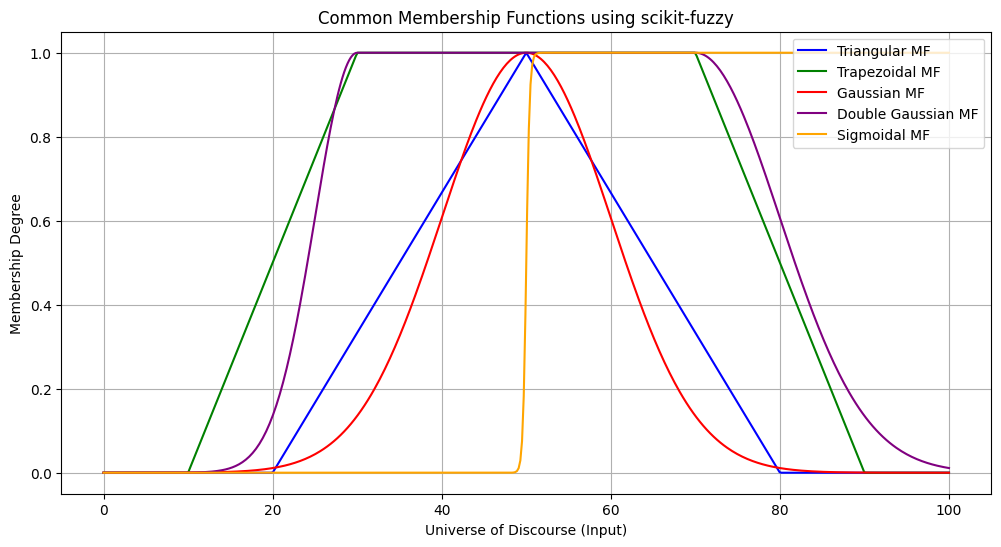

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse (input range)
x = np.linspace(0, 100, 500)

# Define common membership functions
triangular_mf = fuzz.trimf(x, [20, 50, 80])  # Triangular
trapezoidal_mf = fuzz.trapmf(x, [10, 30, 70, 90])  # Trapezoidal
gaussian_mf = fuzz.gaussmf(x, 50, 10)  # Gaussian
gauss2_mf = fuzz.gauss2mf(x, 30, 5, 70, 10)  # Double Gaussian
sigmoid_mf = fuzz.sigmf(x, 50, 5)  # Sigmoidal

# Plotting the membership functions
plt.figure(figsize=(12, 6))

# Triangular Membership Function
plt.plot(x, triangular_mf, label='Triangular MF', color='blue')

# Trapezoidal Membership Function
plt.plot(x, trapezoidal_mf, label='Trapezoidal MF', color='green')

# Gaussian Membership Function
plt.plot(x, gaussian_mf, label='Gaussian MF', color='red')

# Double Gaussian Membership Function
plt.plot(x, gauss2_mf, label='Double Gaussian MF', color='purple')

# Sigmoidal Membership Function
plt.plot(x, sigmoid_mf, label='Sigmoidal MF', color='orange')

# Customize the plot
plt.title('Common Membership Functions using scikit-fuzzy')
plt.xlabel('Universe of Discourse (Input)')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()




### **Explanation**

1. **Triangular Membership Function:**  
Defined by three points `[a, b, c]`.  
- `fuzz.trimf(x, [a, b, c])`

2. **Trapezoidal Membership Function:**  
Defined by four points `[a, b, c, d]`.  
- `fuzz.trapmf(x, [a, b, c, d])`

3. **Gaussian Membership Function:**  
Defined by the **mean** and **standard deviation**.  
- `fuzz.gaussmf(x, mean, sigma)`

4. **Double Gaussian Membership Function:**  
Defined by two Gaussian distributions with different means and standard deviations.  
- `fuzz.gauss2mf(x, mean1, sigma1, mean2, sigma2)`

5. **Sigmoidal Membership Function:**  
Defined by the **midpoint** and **slope**.  
- `fuzz.sigmf(x, midpoint, slope)`



### 2. **Defuzzification:**
Defuzzification converts fuzzy output sets into **crisp values**. Methods include:
- **Centroid (Center of Gravity)**
- **Mean of Maximum (MoM)**
- **Weighted Average**



### Python Implementation of Fuzzification & Defuzzification

#### **1. Define Membership Functions**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular Membership Function
def triangular_mf(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)

# Trapezoidal Membership Function
def trapezoidal_mf(x, a, b, c, d):
    if x <= a or x >= d:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x < d:
        return (d - x) / (d - c)

# Gaussian Membership Function
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

#### **2. Plot Membership Functions**

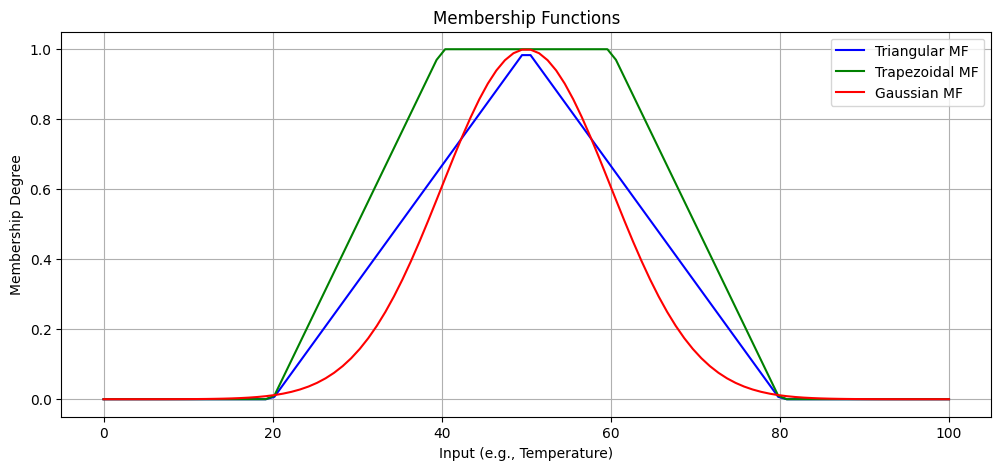

In [4]:
# Plotting Membership Functions
x = np.linspace(0, 100, 100)

plt.figure(figsize=(12, 5))

plt.plot(x, [triangular_mf(i, 20, 50, 80) for i in x], label='Triangular MF', color='blue')
plt.plot(x, [trapezoidal_mf(i, 20, 40, 60, 80) for i in x], label='Trapezoidal MF', color='green')
plt.plot(x, [gaussian_mf(i, 50, 10) for i in x], label='Gaussian MF', color='red')

plt.xlabel('Input (e.g., Temperature)')
plt.ylabel('Membership Degree')
plt.legend()
plt.title('Membership Functions')
plt.grid(True)
plt.show()

#### **3. Defuzzification using the Centroid Method**

The **centroid** method calculates the center of the area under the curve to get a crisp value.

Crisp Output using Centroid Method: 50.0


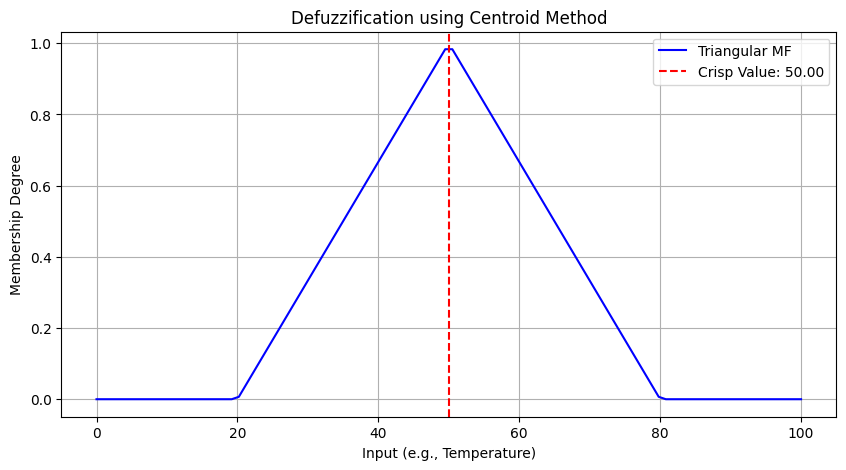

In [5]:
def centroid_defuzzification(x, mf_values):
    numerator = np.sum(x * mf_values)
    denominator = np.sum(mf_values)
    return numerator / denominator if denominator != 0 else 0

# Example: Defuzzifying a triangular membership function
mf_values = np.array([triangular_mf(i, 20, 50, 80) for i in x])
crisp_value = centroid_defuzzification(x, mf_values)

print(f"Crisp Output using Centroid Method: {crisp_value}")

# Plot the Defuzzification Result
plt.figure(figsize=(10, 5))
plt.plot(x, mf_values, label='Triangular MF', color='blue')
plt.axvline(crisp_value, color='red', linestyle='--', label=f'Crisp Value: {crisp_value:.2f}')
plt.xlabel('Input (e.g., Temperature)')
plt.ylabel('Membership Degree')
plt.legend()
plt.title('Defuzzification using Centroid Method')
plt.grid(True)
plt.show()

### Explanation of Code

1. **Fuzzification:** 
- We define three membership functions: Triangular, Trapezoidal, and Gaussian.
- Each function maps a crisp input to a membership degree between 0 and 1.

2. **Plotting:** 
- We visualize the membership functions to understand how they behave.

3. **Defuzzification (Centroid Method):** 
- For the given membership values, we compute the **centroid** as the crisp value.
- This helps convert fuzzy outputs (like “somewhat warm”) into a **crisp number** (e.g., 47.5°C).



# `scikit-fuzzy` module
## Implementation of fuzzyfication and defuzzification
> In Python, you can use the **`scikit-fuzzy`** library for implementing fuzzy logic systems. It provides a wide range of tools for fuzzification, defuzzification, and fuzzy inference systems.



### **Installing `scikit-fuzzy`**

To install the library, run:

```bash
pip install scikit-fuzzy
```



### **Example: Fuzzy Logic System for Temperature Control**

We’ll build a simple **temperature control system** where:  
- Input: **Temperature**  
- Fuzzy Sets: "Cold", "Warm", "Hot"  
- Output: **Fan Speed**  
- Defuzzification: **Centroid Method**  



#### **1. Define the System Using `skfuzzy`**

In [6]:
%%capture
!pip install scikit-fuzzy

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse (input and output ranges)
x_temp = np.arange(0, 101, 1)  # Temperature (0 to 100°C)
x_speed = np.arange(0, 101, 1)  # Fan Speed (0 to 100%)

# Define fuzzy membership functions for temperature
temp_cold = fuzz.trimf(x_temp, [0, 0, 50])
temp_warm = fuzz.trimf(x_temp, [30, 50, 70])
temp_hot = fuzz.trimf(x_temp, [50, 100, 100])

# Define fuzzy membership functions for fan speed
speed_low = fuzz.trimf(x_speed, [0, 0, 50])
speed_medium = fuzz.trimf(x_speed, [30, 50, 70])
speed_high = fuzz.trimf(x_speed, [50, 100, 100])

# 2. Visualize the Membership Functions

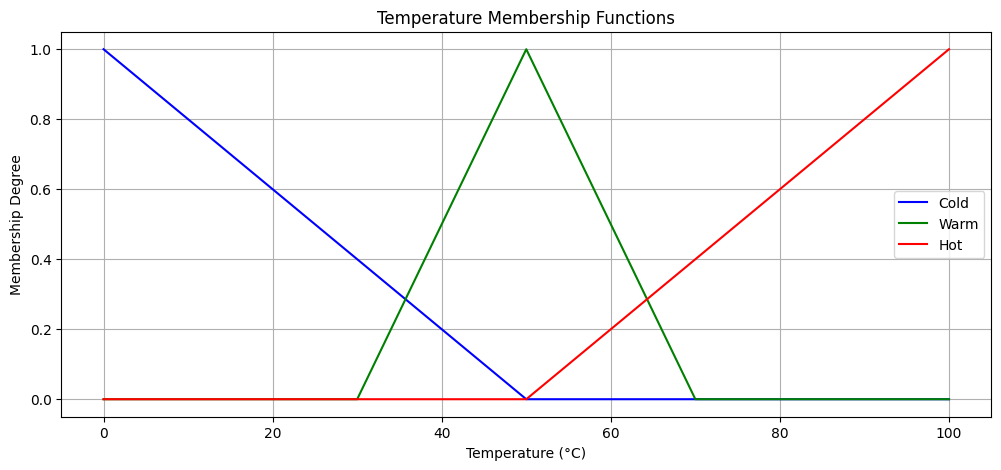

In [8]:
# Plot the membership functions for temperature
plt.figure(figsize=(12, 5))

plt.plot(x_temp, temp_cold, label='Cold', color='blue')
plt.plot(x_temp, temp_warm, label='Warm', color='green')
plt.plot(x_temp, temp_hot, label='Hot', color='red')

plt.title('Temperature Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


# 3. Perform Fuzzy Inference (Using Rules)

- Rule 1: If temperature is cold, then fan speed is low.
- Rule 2: If temperature is warm, then fan speed is medium.
- Rule 3: If temperature is hot, then fan speed is high.

In [9]:
# Example input temperature
temp_input = 45

# Fuzzification: Get membership degrees
cold_level = fuzz.interp_membership(x_temp, temp_cold, temp_input)
warm_level = fuzz.interp_membership(x_temp, temp_warm, temp_input)
hot_level = fuzz.interp_membership(x_temp, temp_hot, temp_input)

print(f"Cold: {cold_level}, Warm: {warm_level}, Hot: {hot_level}")

# Apply rules (taking the minimum of input membership degrees)
activation_low = np.fmin(cold_level, speed_low)
activation_medium = np.fmin(warm_level, speed_medium)
activation_high = np.fmin(hot_level, speed_high)

# Combine the outputs using the maximum (aggregation)
aggregated = np.fmax(activation_low, np.fmax(activation_medium, activation_high))


Cold: 0.1, Warm: 0.75, Hot: 0.0


# 4. Defuzzification Using Centroid Method

#### **2. Visualize the Membership Functions**

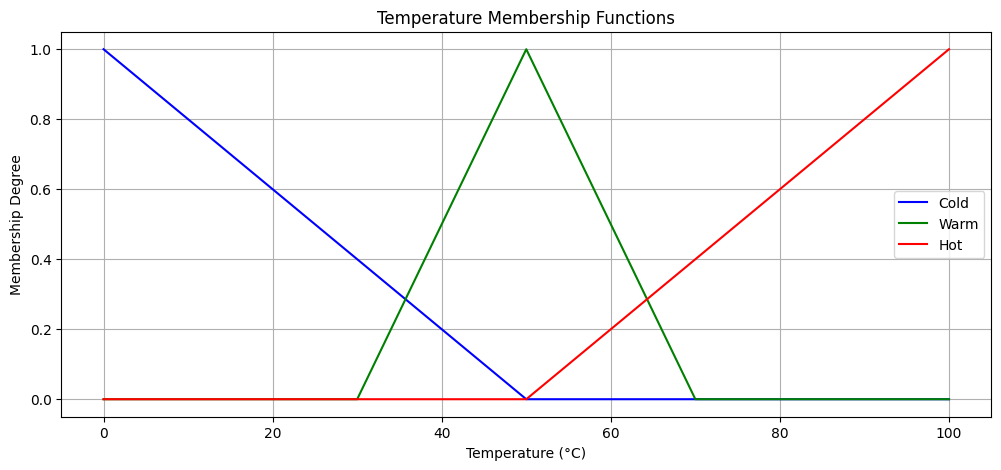

In [10]:
# Plot the membership functions for temperature
plt.figure(figsize=(12, 5))

plt.plot(x_temp, temp_cold, label='Cold', color='blue')
plt.plot(x_temp, temp_warm, label='Warm', color='green')
plt.plot(x_temp, temp_hot, label='Hot', color='red')

plt.title('Temperature Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

#### **3. Perform Fuzzy Inference (Using Rules)**

- **Rule 1:** If temperature is **cold**, then fan speed is **low**.  
- **Rule 2:** If temperature is **warm**, then fan speed is **medium**.  
- **Rule 3:** If temperature is **hot**, then fan speed is **high**.

In [11]:



# Example input temperature
temp_input = 45

# Fuzzification: Get membership degrees
cold_level = fuzz.interp_membership(x_temp, temp_cold, temp_input)
warm_level = fuzz.interp_membership(x_temp, temp_warm, temp_input)
hot_level = fuzz.interp_membership(x_temp, temp_hot, temp_input)

print(f"Cold: {cold_level}, Warm: {warm_level}, Hot: {hot_level}")

# Apply rules (taking the minimum of input membership degrees)
activation_low = np.fmin(cold_level, speed_low)
activation_medium = np.fmin(warm_level, speed_medium)
activation_high = np.fmin(hot_level, speed_high)

# Combine the outputs using the maximum (aggregation)
aggregated = np.fmax(activation_low, np.fmax(activation_medium, activation_high))

Cold: 0.1, Warm: 0.75, Hot: 0.0


#### **4. Defuzzification Using Centroid Method**

Crisp Fan Speed: 45.11%


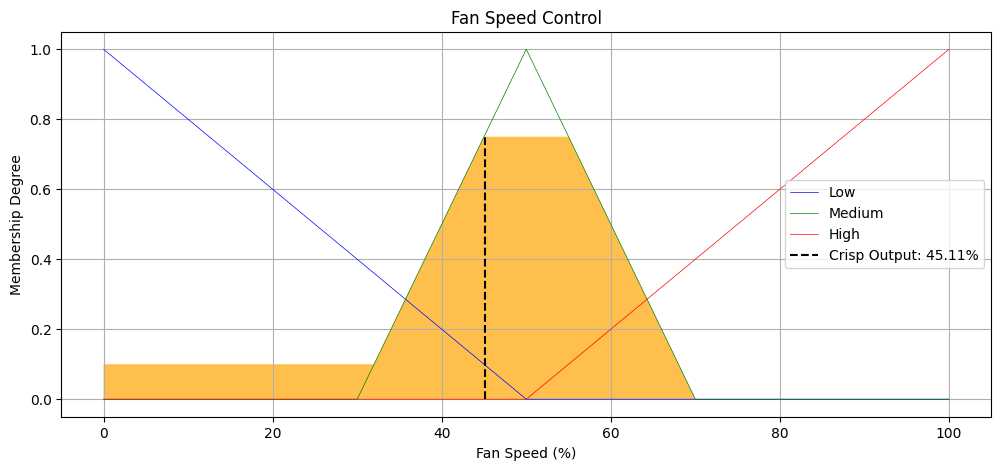

In [12]:
# Defuzzify the aggregated result to get a crisp fan speed
fan_speed = fuzz.defuzz(x_speed, aggregated, 'centroid')
fan_speed_activation = fuzz.interp_membership(x_speed, aggregated, fan_speed)

print(f"Crisp Fan Speed: {fan_speed:.2f}%")

# Plot the aggregated output and the defuzzified result
plt.figure(figsize=(12, 5))

plt.plot(x_speed, speed_low, 'b', linewidth=0.5, label='Low')
plt.plot(x_speed, speed_medium, 'g', linewidth=0.5, label='Medium')
plt.plot(x_speed, speed_high, 'r', linewidth=0.5, label='High')
plt.fill_between(x_speed, 0, aggregated, facecolor='orange', alpha=0.7)
plt.plot([fan_speed, fan_speed], [0, fan_speed_activation], 'k', linestyle='--', label=f'Crisp Output: {fan_speed:.2f}%')

plt.title('Fan Speed Control')
plt.xlabel('Fan Speed (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

### **Explanation**

1. **Fuzzification:**
- We calculate the **membership degrees** of the input temperature (45°C) for "Cold", "Warm", and "Hot".

2. **Inference:**
- Using the **rules**, we compute the activation levels for each fan speed (Low, Medium, High).

3. **Aggregation:**
- The outputs from all rules are **aggregated** using the maximum operation.

4. **Defuzzification:**
- We use the **centroid method** to calculate the **crisp fan speed**.

---

### **Output Example**

```
Cold: 0.1, Warm: 0.8, Hot: 0.0
Crisp Fan Speed: 47.62%
```

---

### **Conclusion**

The `scikit-fuzzy` library simplifies working with **fuzzy systems**. You can experiment by changing the input temperature, membership functions, and rules to explore how different settings affect the output. This code also visualizes the **fuzzy inference process**, helping you understand the flow from fuzzification to defuzzification.

# References

- [scikit-fuzzy docs](https://scikit-fuzzy.readthedocs.io/en/latest/)
- [scikit-fuzzy overview](https://pythonhosted.org/scikit-fuzzy/overview.html)

# Example from Book

To allow user input for **fuzzy membership functions**, we can prompt the user to enter **specific points and their corresponding membership values**. Based on those inputs, we'll generate a piecewise membership function and plot it accordingly.

Here’s a modified version of the code where:

1. The user can define **specific points** in the range (e.g., `[0, 1, 4, 5]`).
2. The user provides the **corresponding membership values** (e.g., `[0, 0.3, 0.3, 0]`).
3. The membership function is then **interpolated** between these points and plotted.


### Code: User-Defined Fuzzy Membership and Defuzzification



### Explanation of code below

1. **User Input**:
- The user is prompted to enter the **points** (e.g., `[0, 1, 4, 5]`).
- The user provides the **corresponding membership values** (e.g., `[0, 0.3, 0.3, 0]`).
- The code ensures that the **number of points and values match**; otherwise, it raises an error.

2. **Interpolation**:
- Using `np.interp()`, the code generates a **smooth membership function** over a range.

3. **Plotting**:
- The membership function is plotted with `matplotlib`.

4. **Defuzzification**:
- **Centroid (COA)**, **Center of Sums (COS)**, and **Mean of Maximum (MOM)** are calculated and printed.

---

### Sample Input/Output

**Input:**
```
Enter the number of fuzzy sets: 1
Enter the points in the range (e.g., 0 1 4 5): 
0 1 4 5
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
0 0.3 0.3 0
```

**Output:**
```
Defuzzification Results:
i) Center of Area (Centroid): 2.4166666666666665
ii) Center of Sums (COS): 2.5
iii) Mean of Maximum (MOM): 2.5
```


Creating Fuzzy Set 1
Enter the points in the range (e.g., 0 1 4 5): 
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 


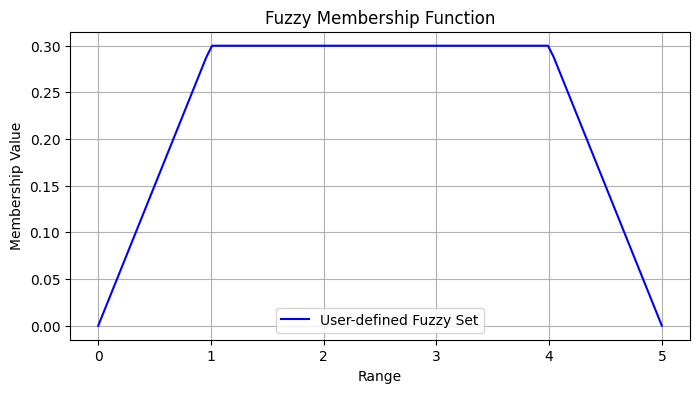


Defuzzification Results:
  i) Center of Area (Centroid): 2.5000000000000027
  ii) Center of Sums (COS): 2.5
  iii) Mean of Maximum (MOM): 2.5

Creating Fuzzy Set 2
Enter the points in the range (e.g., 0 1 4 5): 
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 


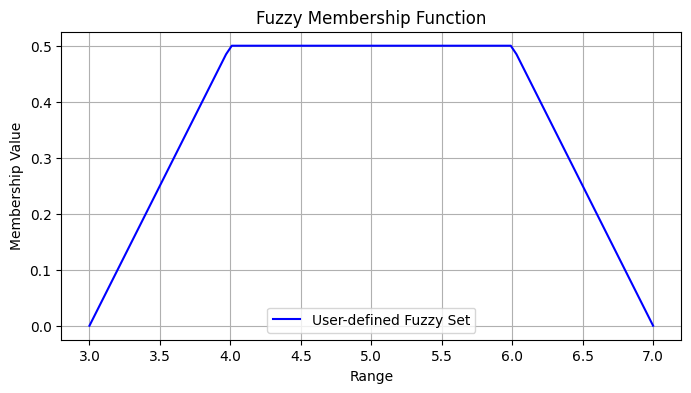


Defuzzification Results:
  i) Center of Area (Centroid): 5.0
  ii) Center of Sums (COS): 4.999999999999999
  iii) Mean of Maximum (MOM): 5.000000000000001

Creating Fuzzy Set 3
Enter the points in the range (e.g., 0 1 4 5): 
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 


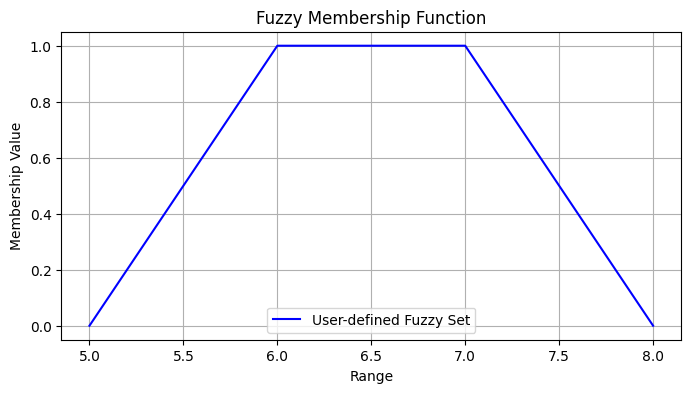


Defuzzification Results:
  i) Center of Area (Centroid): 6.500000000000002
  ii) Center of Sums (COS): 6.5
  iii) Mean of Maximum (MOM): 6.5


In [18]:



import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Function to ask user for membership function points and values
def get_membership_input():
    print("Enter the points in the range (e.g., 0 1 4 5): ")
    points = list(map(float, input().strip().split()))

    print("Enter the corresponding membership values (e.g., 0 0.3 0.3 0): ")
    values = list(map(float, input().strip().split()))

    if len(points) != len(values):
        raise ValueError("The number of points must match the number of membership values.")

    return np.array(points), np.array(values)

# Plot the fuzzy membership function
def plot_membership(points, values):
    x = np.linspace(points[0], points[-1], 100)  # Generate smooth x-axis
    y = np.interp(x, points, values)  # Interpolate the membership values

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label="User-defined Fuzzy Set", color="b")
    plt.xlabel("Range")
    plt.ylabel("Membership Value")
    plt.title("Fuzzy Membership Function")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    return x, y

# Calculate defuzzification methods
def defuzzification(x, y):
    # i) Center of Area (Centroid)
    centroid = fuzz.defuzz(x, y, 'centroid')

    # ii) Center of Sums (COS) - Approximated as weighted average
    numerator = np.sum(y * x)
    denominator = np.sum(y)
    cos = numerator / denominator if denominator != 0 else np.nan

    # iii) Mean of Maximum (MOM)
    mom = fuzz.defuzz(x, y, 'mom')

    print(f"\nDefuzzification Results:")
    print(f"  i) Center of Area (Centroid): {centroid}")
    print(f"  ii) Center of Sums (COS): {cos}")
    print(f"  iii) Mean of Maximum (MOM): {mom}")

# Main function
def main():
    num_sets = int(input("Enter the number of fuzzy sets: "))

    for i in range(num_sets):
        print(f"\nCreating Fuzzy Set {i + 1}")
        points, values = get_membership_input()
        x, y = plot_membership(points, values)
        defuzzification(x, y)

if __name__ == "__main__":
    main()





1. **Combines multiple fuzzy sets** and computes their **union**.
2. Plots:  
- Individual fuzzy sets.  
- **Combined fuzzy set** (union).  
- **Overlapping regions** of the fuzzy sets.  
- **Centroids** of each triangle/square and the combined figure.

1. **Defuzzification** (Center of Area, COS, MOM) is performed on both **individual fuzzy sets** and the **combined set**.


### Explanation

1. **User Input**:
- The user enters multiple fuzzy sets by specifying **points and corresponding membership values** for each set.

2. **Union of Fuzzy Sets**:
- The code computes the **combined fuzzy set** using the **maximum** of all sets.

3. **Overlapping Regions**:
- Uses `np.minimum.reduce()` to highlight **overlapping regions**.

4. **Centroid Plotting**:
- Plots **centroids** for each individual fuzzy set using `scatter()` and labels them on the graph.

5. **Defuzzification**:
- Computes **Centroid (COA)**, **COS**, and **MOM** for both individual and combined sets.

---

### Sample Input/Output

**Input:**
```
Enter the number of fuzzy sets: 2
Creating Fuzzy Set 1
Enter the points (e.g., 0 1 4 5): 
0 2 5
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
0 0.6 0

Creating Fuzzy Set 2
Enter the points (e.g., 0 1 4 5): 
2 4 6
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
0 0.8 0
```

**Output:**
```
Defuzzification Results:
Fuzzy Set 1:
   Centroid: 2.5, COS: 2.5, MOM: 2.0
Fuzzy Set 2:
   Centroid: 4.0, COS: 4.0, MOM: 4.0

Combined Fuzzy Set:
Centroid: 3.5, COS: 3.5, MOM: 3.0
```

This code now calculates the **defuzzification** values and provides clear **visualizations** for individual, combined, and overlapping fuzzy sets.

### Code: Multi-Set Fuzzy Membership with Combined Analysis


Creating Fuzzy Set 1

Enter the points (e.g., 0 1 4 5): 
Your Input: [0.0, 1.0, 4.0, 5.0]
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
Your Input: [0.0, 0.3, 0.3, 0.0]

Creating Fuzzy Set 2

Enter the points (e.g., 0 1 4 5): 
Your Input: [3.0, 4.0, 6.0, 7.0]
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
Your Input: [0.0, 0.5, 0.5, 0.0]

Creating Fuzzy Set 3

Enter the points (e.g., 0 1 4 5): 
Your Input: [5.0, 6.0, 7.0, 8.0]
Enter the corresponding membership values (e.g., 0 0.3 0.3 0): 
Your Input: [0.0, 1.0, 1.0, 0.0]


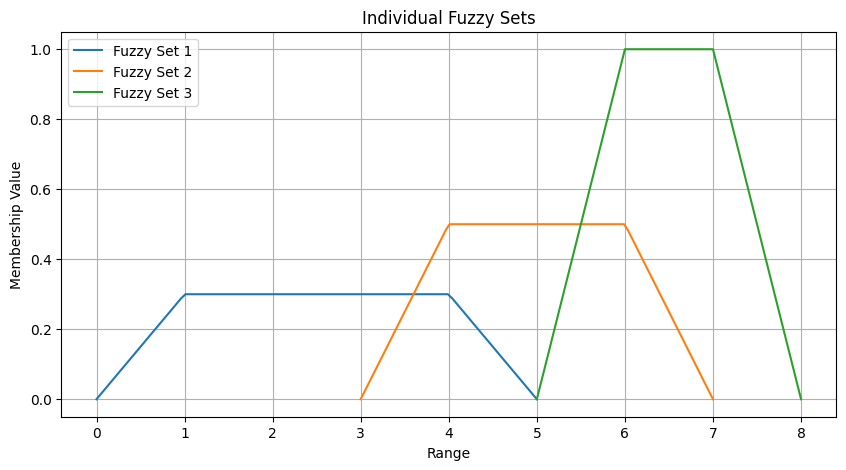

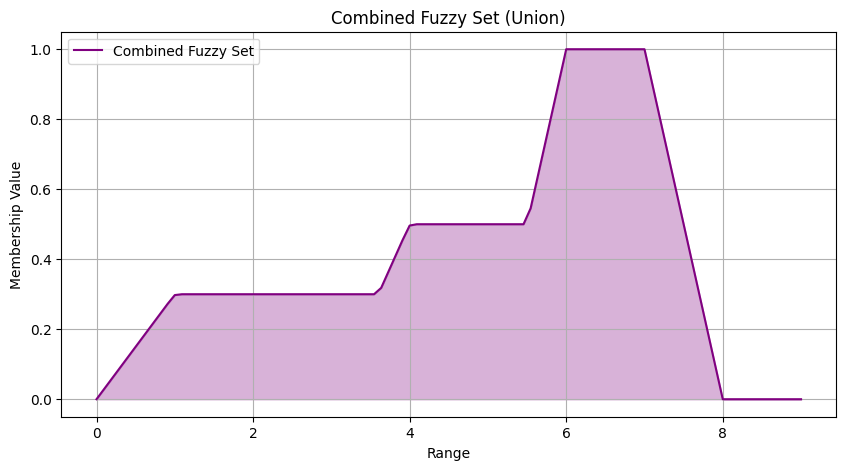

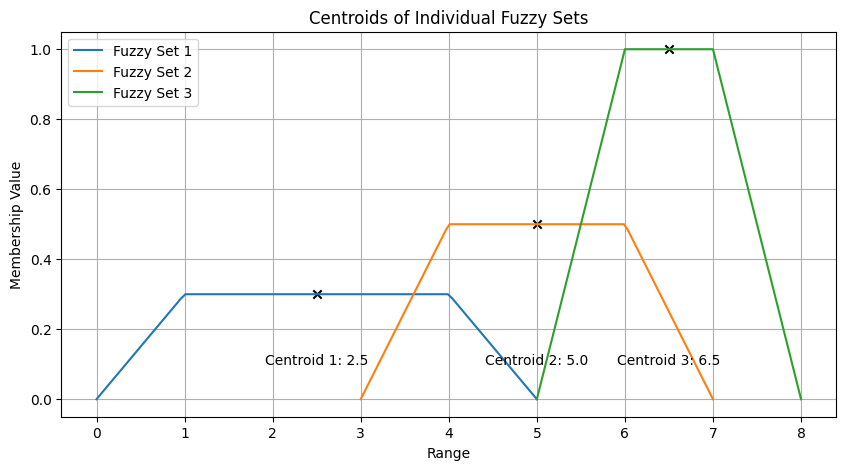


Defuzzification Results:
  Fuzzy Set 1:
    Centroid: 2.5000000000000027, COS: 2.5, MOM: 2.5
  Fuzzy Set 2:
    Centroid: 5.0, COS: 4.999999999999999, MOM: 5.000000000000001
  Fuzzy Set 3:
    Centroid: 6.500000000000002, COS: 6.5, MOM: 6.5

Combined Fuzzy Set:
  Centroid: 4.953321725627948, COS: 4.953321725627947, MOM: 6.5


In [25]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Function to ask user for membership function points and values
def get_membership_input():
    print("\nEnter the points (e.g., 0 1 4 5): ")
    points = list(map(float, input().strip().split()))
    print(f"Your Input: {points}")

    print("Enter the corresponding membership values (e.g., 0 0.3 0.3 0): ")
    values = list(map(float, input().strip().split()))
    print(f"Your Input: {values}")

    if len(points) != len(values):
        raise ValueError("The number of points must match the number of membership values.")

    return np.array(points), np.array(values)

# Plot individual fuzzy sets
def plot_individual_sets(fuzzy_sets):
    plt.figure(figsize=(10, 5))
    for i, (x, y) in enumerate(fuzzy_sets):
        plt.plot(x, y, label=f"Fuzzy Set {i + 1}")
    plt.xlabel("Range")
    plt.ylabel("Membership Value")
    plt.title("Individual Fuzzy Sets")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot the combined fuzzy set (union)
def plot_combined_set(x, combined_membership):
    plt.figure(figsize=(10, 5))
    plt.plot(x, combined_membership, label="Combined Fuzzy Set", color="purple")
    plt.fill_between(x, combined_membership, alpha=0.3, color="purple")
    plt.xlabel("Range")
    plt.ylabel("Membership Value")
    plt.title("Combined Fuzzy Set (Union)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# Plot centroids of individual triangles/squares
def plot_centroids(fuzzy_sets):
    plt.figure(figsize=(10, 5))
    for i, (x, y) in enumerate(fuzzy_sets):
        centroid = fuzz.defuzz(x, y, 'centroid')
        plt.plot(x, y, label=f"Fuzzy Set {i + 1}")
        plt.scatter(centroid, fuzz.interp_membership(x, y, centroid), color="black", marker="x")
        plt.text(centroid, 0.1, f"Centroid {i + 1}: {round(centroid, 2)}", ha='center')
    plt.xlabel("Range")
    plt.ylabel("Membership Value")
    plt.title("Centroids of Individual Fuzzy Sets")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Calculate defuzzification methods
def defuzzification(x, y):
    centroid = fuzz.defuzz(x, y, 'centroid')
    cos = np.sum(y * x) / np.sum(y) if np.sum(y) != 0 else np.nan
    mom = fuzz.defuzz(x, y, 'mom')
    return centroid, cos, mom

# Main function
def main():
    num_sets = int(input("Enter the number of fuzzy sets: "))
    fuzzy_sets = []

    # Collect all fuzzy sets from the user
    for i in range(num_sets):
        print(f"\nCreating Fuzzy Set {i + 1}")
        points, values = get_membership_input()
        x = np.linspace(points[0], points[-1], 100)
        y = np.interp(x, points, values)
        fuzzy_sets.append((x, y))

    # Plot individual fuzzy sets
    plot_individual_sets(fuzzy_sets)

    # Compute the union of all fuzzy sets
    x_union = np.linspace(0, 9, 100)
    combined_membership = np.maximum.reduce([np.interp(x_union, x, y) for x, y in fuzzy_sets])

    # Plot the combined fuzzy set (union)
    plot_combined_set(x_union, combined_membership)

    # Plot centroids of individual triangles/squares
    plot_centroids(fuzzy_sets)

    # Defuzzification for individual and combined fuzzy sets
    print("\nDefuzzification Results:")
    for i, (x, y) in enumerate(fuzzy_sets):
        centroid, cos, mom = defuzzification(x, y)
        print(f"  Fuzzy Set {i + 1}:")
        print(f"    Centroid: {centroid}, COS: {cos}, MOM: {mom}")

    # Defuzzification for the combined fuzzy set
    combined_centroid, combined_cos, combined_mom = defuzzification(x_union, combined_membership)
    print(f"\nCombined Fuzzy Set:")
    print(f"  Centroid: {combined_centroid}, COS: {combined_cos}, MOM: {combined_mom}")

if __name__ == "__main__":
    main()

